In [ ]:
import numpy as np 
import random
from numpy import *
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

corr matrix: 
 [ 0.62227218 -0.65812023  0.45567116 -0.86182825  0.88943067 -0.00258653
  0.269841    0.08736759  1.          0.97586181]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TypeError: sklearn_linear_mod() takes 3 positional arguments but 4 were given

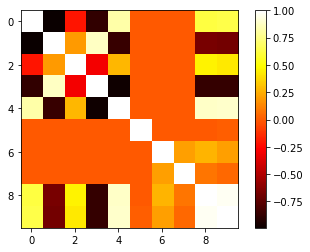

In [2]:
def get_data(normalise, i):
    data = np.genfromtxt("datasets/ENB2012_data.csv", delimiter=",")
    #data_X = data_in[:,0:8]   # all features 0-7
    #data_X = data_in[:,[1]]   # one feature
    data_X = data[:,[0,3]]  # two features
    
    if normalise == True:
        transformer = Normalizer().fit(data_X)
        data_X = transformer.transform(data_X)
    
    corr_mat = np.corrcoef(data.T)
    print("corr matrix: \n", corr_mat[:, 8])
    
    plt.imshow(corr_mat, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.savefig('figures/cov_heatmap.png')
    plt.clf
    
    data_y = data[:, 8]
    
    percent_test = 0.4
    
    '''
    test_size = int(percent_test * data_X.shape[0])
    X_train = data_X[: -test_size]
    X_test = data_X[-test_size :]
    y_train = data_y[: -test_size]
    y_test = data_y[-test_size :]
    '''
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=percent_test, random_state=i)
    
    return X_train, X_test, y_train, y_test

def sklearn_linear_mod(X_train, y_train, y_test):
    linreg = linear_model.LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    residuals = y_pred - y_test
    plt.plot(residuals, linewidth=1)
    plt.savefig("figures/sklearn_linreg.png")
    
    return rmse, r2, linreg.coef_

def main():
    normalise = False
    num_exp = 10
    rmse_list = np.zeros(num_exp)
    r2_list = np.zeros(num_exp)
    
    for i in range(num_exp):
        X_train, X_test, y_train, y_test = get_data(normalise, i)
        rmse, r2, coef = sklearn_linear_mod(X_train, X_test, y_train, y_test)
        rmse_list[i] = rmse
        r2_list[i] = r2
        
    print("RMSE: \n", rmse_list)
    print("R-squared: \n", r2_list)
    
    mean_rmse = np.mean(rmse_list)
    std_rmse = np.std(rmse_list)
    
    mean_r2 = np.mean(r2_list)
    std_r = np.std(r2_list)
    
    print("Mean RMSE: ", mean_rmse)
    print("std of RMSE: ", std_rmse)
    print("Mean R-squared value: ", mean_r2)
    print("std of R-squared value: ", std_r2)
    

if __name__ == '__main__':
    main()